# **COMPUTER VISION ASSIGNMENT - 3**
## **AMOGH GARG - 2020UCO1688**

Consider a grey level image f(x, y) of size 256x256 with 1< x, y ≤256, which has the following intensities:

**f(x,y)** = r+1 1≤x≤12andl≤ y ≤12 

         r 13≤x≤16,1≤ y ≤16 and 
   
         r+2 1≤x≤12,13≤ y ≤16 elsewhere

with 0 ≤r≤253.

`(i) Sketch the image f(x, y) and comment on its visual appearance. Justify your answer.`

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import cv2

**DEFINING FUNCTIONS**

In [2]:
def create_image(size, r):
    image = np.zeros((size, size))
    for x in range(1, size + 1):
        for y in range(1, size + 1):
            if 1 <= x <= 12 and 1 <= y <= 12:
                image[x-1, y-1] = r + 1
            elif 13 <= x <= 16 and 1 <= y <= 16:
                image[x-1, y-1] = r + 2
            elif 1 <= x <= 12 and 13 <= y <= 16:
                image[x-1, y-1] = r + 2
            else :
                image[x-1, y-1] = r;
    return image

def display_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
def hist_equalize(img):
    # Convert the input image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute the cumulative distribution function
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Use the CDF to equalize the histogram
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    equalized_img = cdf[gray]
    
    return equalized_img

def local_hist_equalize(img, patch_size=16):
    # Convert the input image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create a copy of the input image
    equalized_img = np.zeros(gray.shape, dtype=img.dtype)

    # Divide the image into patches of size patch_size x patch_size
    for i in range(0, img.shape[0], patch_size):
        for j in range(0, img.shape[1], patch_size):
            patch = gray[i:i+patch_size, j:j+patch_size]

            # Compute the cumulative distribution function for each patch
            hist, bins = np.histogram(patch.flatten(), 256, [0, 256])
            cdf = hist.cumsum()
            cdf_normalized = cdf * hist.max() / cdf.max()

            # Use the CDF to equalize the histogram for each patch
            cdf_m = np.ma.masked_equal(cdf,0)
            cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
            cdf = np.ma.filled(cdf_m,0).astype('uint8')
            patch = cdf[patch]
            equalized_img[i:i+patch_size, j:j+patch_size] = patch

    return equalized_img

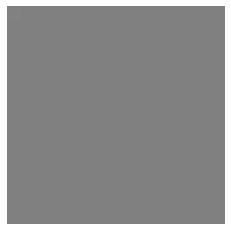

In [3]:
size = 256
r = 128
image1 = create_image(size, r)
image = im.fromarray(image1)
cv2.imwrite('Img-2.jpg',image1)
display_image(image)

We can observe that the visual appearance of the image is same throughout because pixel intensities varies only in the small range of [r,r+2].

`(ii) Apply global histogram equalisation on the above image. Comment on the visual appearance of the resulting equalised image.`

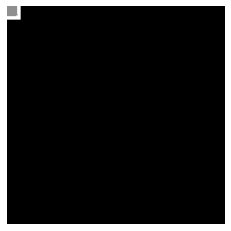

In [4]:
img = cv2.imread("Img-2.jpg")
equalized_img = hist_equalize(img)
display_image(equalized_img)

`(iii) Apply local histogram equalisation on the above image using non-overlapping image patches of size 16×16. Comment on the visual appearance of the resulting locally equalised image.`


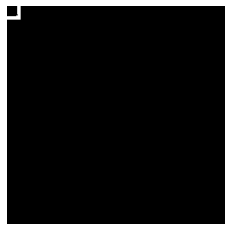

In [5]:
img = cv2.imread("Img-2.jpg")
equalized_img = local_hist_equalize(img)
display_image(equalized_img)

`(iv) Based on the above observations, which of the two types of equalisation processes would you choose for the visual improvement of the particular image? Justify your answer.`

Global histogram equalization is best suited for images with low contrast, where the intensity values are not distributed evenly across the whole image. This technique transforms the intensity values to produce a uniform distribution of intensities, which results in an increase in contrast and a better visual appearance of the image.

On the other hand, local histogram equalization is best suited for images with high contrast, where some regions of the image have a high dynamic range of intensities. This technique equalizes the histogram of small regions of the image, rather than the entire image, which helps to preserve the details in the high-contrast regions while still improving the overall visual appearance of the image.

In our case, applying global histogram equalisation is a better choice as in case of global equalisation, the 16 x 16 patches are not being divided by sharp boundaries as in case of local equalisation (which decreases the overall sharpness and visual quality of the image).

In [6]:
# Let's apply these on random images
contrast_img = cv2.imread("Img-1.jpg")
# applying global equlaization on low_contrast_img
global_eq_img = hist_equalize(contrast_img)
# applying local equalization on low_contrast_img
local_eq_img = local_hist_equalize(contrast_img)

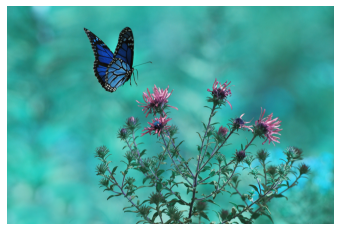

In [7]:
# original_image
display_image(contrast_img)

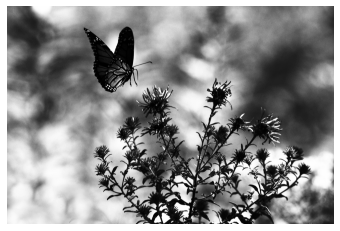

In [8]:
# after applying global optimization
display_image(global_eq_img)

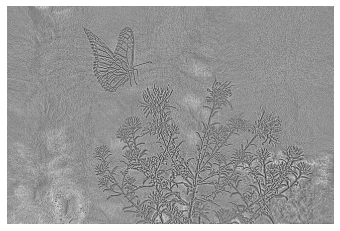

In [9]:
# after applying global optimization
display_image(local_eq_img)